In [11]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')  # Замените на путь к вашему файлу

# Предобработка текста (удаление стоп-слов и стемминг)
def preprocess_text(text):
    stop_words = set(stopwords.words("russian"))
    ps = PorterStemmer()

    words = word_tokenize(text.lower(), language='russian')
    filtered_words = [ps.stem(word) for word in words if word.isalnum() and word not in stop_words]

    return " ".join(filtered_words)

# Склеивание ответов на каждый вопрос в одну строку
responses = []
for i, row in df.iterrows():
    combined_response = ' '.join([preprocess_text(str(row[col])) for col in df.columns[3:]])  # Начинаем с 3-го столбца, так как первые три столбца - это ID, Время создания и Выберите свою группу
    responses.append(combined_response)

# Создание векторного представления с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(responses)

# Рассчет косинусного сходства
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)


for i in range(len(responses)):
    for j in range(len(responses)):
        print(f"Косинусное сходство между ответами {i+1} и {j+1}: {cosine_similarities[i][j]:.2f}")




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naclz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naclz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Косинусное сходство между ответами 1 и 1: 1.00
Косинусное сходство между ответами 1 и 2: 0.29
Косинусное сходство между ответами 1 и 3: 0.55
Косинусное сходство между ответами 1 и 4: 0.44
Косинусное сходство между ответами 1 и 5: 0.43
Косинусное сходство между ответами 1 и 6: 0.38
Косинусное сходство между ответами 1 и 7: 0.35
Косинусное сходство между ответами 1 и 8: 0.44
Косинусное сходство между ответами 1 и 9: 0.60
Косинусное сходство между ответами 1 и 10: 0.22
Косинусное сходство между ответами 1 и 11: 0.15
Косинусное сходство между ответами 1 и 12: 0.49
Косинусное сходство между ответами 1 и 13: 0.51
Косинусное сходство между ответами 1 и 14: 0.36
Косинусное сходство между ответами 1 и 15: 0.16
Косинусное сходство между ответами 1 и 16: 0.59
Косинусное сходство между ответами 1 и 17: 0.33
Косинусное сходство между ответами 1 и 18: 0.56
Косинусное сходство между ответами 1 и 19: 0.19
Косинусное сходство между ответами 1 и 20: 0.35
Косинусное сходство между ответами 1 и 21: 0.32
К

C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Figure size 1500x800 with 0 Axes>

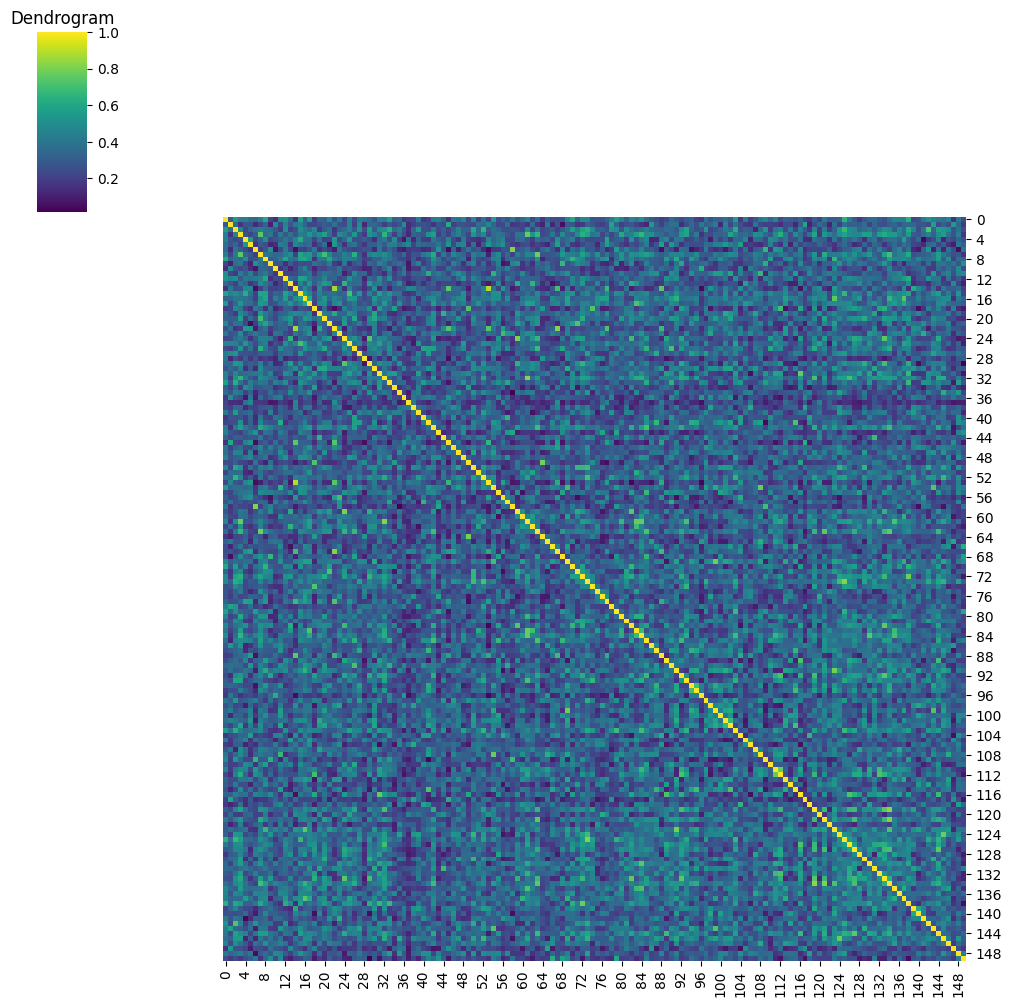

             ID  Cluster
0    1535754580        2
1    1535754032        4
2    1535753624        2
3    1535751700        2
4    1535751685        2
..          ...      ...
145  1534230056        2
146  1531950248        2
147  1531524267        4
148  1531420154        2
149  1531416707        0

[150 rows x 2 columns]


In [15]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt


n_clusters = 5  
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')
clusters = cluster_model.fit_predict(cosine_similarities)

plt.figure(figsize=(15, 8))
sns.clustermap(cosine_similarities, method='average', cmap='viridis', col_cluster=False, row_cluster=False)
plt.title('Dendrogram')
plt.show()

df['Cluster'] = clusters
print(df[['ID', 'Cluster']])

cluster_results_file = "cluster_results.csv"
df.to_csv(cluster_results_file, index=False)
print(f"Cluster results saved to {cluster_results_file}")

In [25]:
output_file = "cluster_output1.csv"

with open(output_file, 'w', encoding='utf-8') as f:
    for cluster_id in range(n_clusters):
        cluster_df = df[df['Cluster'] == cluster_id]
        f.write(f'\nCluster {cluster_id}:\n')
        f.write(f'{cluster_df.to_markdown(index=False)}\n')

print(f"Cluster results saved to {output_file}")

output_file = "cluster_output.csv"

for cluster_id in range(n_clusters):
    cluster_df = df[df['Cluster'] == cluster_id]
    cluster_df.to_csv(output_file, mode='a', header=cluster_id == 0, index=False, encoding='utf-8')

print(f"Cluster results saved to {output_file}")


Cluster results saved to cluster_output1.csv
Cluster results saved to cluster_output.csv


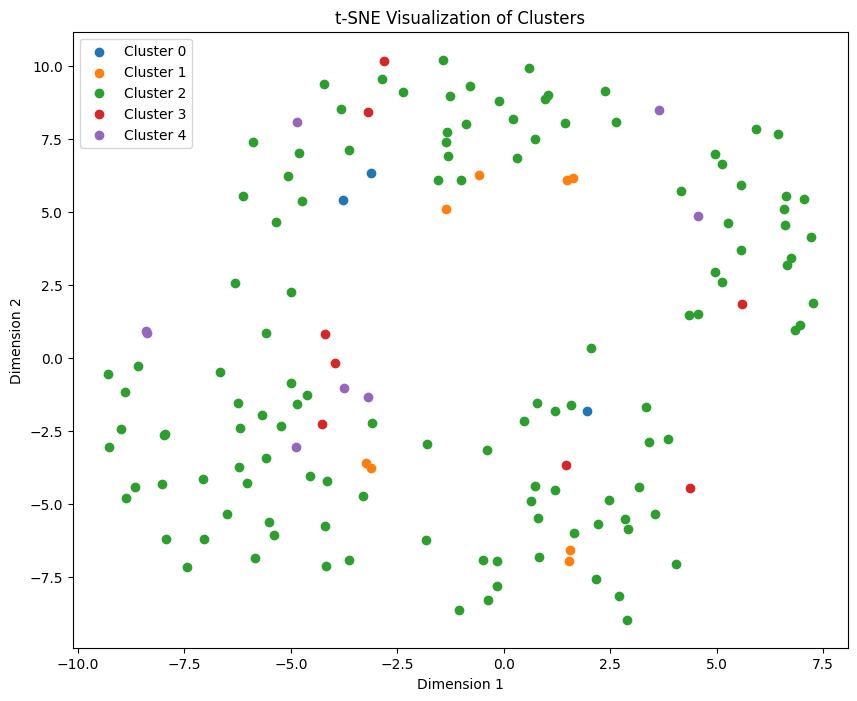

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder


features = df.columns[3:]

df_encoded = df.copy()


label_encoder = LabelEncoder()
for col in features:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# # Экспериментируйте с параметрами t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_representation = tsne.fit_transform(df_encoded[features])


df_tsne = pd.DataFrame(tsne_representation, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = df['Cluster']


plt.figure(figsize=(10, 8))
for cluster_id in range(n_clusters):
    cluster_data = df_tsne[df_tsne['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster_id}')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()



In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   ID                                                                                                                                        150 non-null    int64 
 1   Время создания                                                                                                                            150 non-null    object
 2   Выберите свою группу                                                                                                                      148 non-null    object
 3   Какое из утверждений наиболее близко описывает ваше отношени

In [34]:
print(df_encoded.isnull().sum())

ID                                                                                                                                          0
Время создания                                                                                                                              0
Выберите свою группу                                                                                                                        2
Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?                                             0
В какой тематике вы бы хотели участвовать в научной конференции?                                                                            0
Что вас могло бы мотивировать принять участие в научной конференции?                                                                        0
Как вы считаете, насколько важно для первокурсников участвовать в научных конференциях?                                                     0
Какие 

In [37]:
print(df_encoded.describe())

                 ID  \
count  1.500000e+02   
mean   1.534305e+09   
std    5.460512e+05   
min    1.531417e+09   
25%    1.534240e+09   
50%    1.534259e+09   
75%    1.534365e+09   
max    1.535755e+09   

       Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?  \
count                                         150.000000                                                 
mean                                            0.666667                                                 
std                                             0.879801                                                 
min                                             0.000000                                                 
25%                                             0.000000                                                 
50%                                             0.000000                                                 
75%                                             1.